In [1]:
# Import required libraries and dependencies
# This starter code was provided to me in this format, with all imports listed at the top of the notebook.
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### In this step, the intructions are:
* Load the crypto_market_data.csv into a DataFrame and set the index to the “coin_id” column.

### After displaying the dataframe, the index is already set to "coin_id"

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Checking the dataframe types 
# Reference: Mod.11 Day 2 Activity 3
market_data_df.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

In [5]:
# Obtaining column names
# Reference: Mod.11 Day 2 Activity 3
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Reference: Mod.11 Day 2 Activity 3
# Here, I am normalizing the data contained in each of columns from my above dataframe, leaving out the index 'coin_id'
market_data_scaled = StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h','price_change_percentage_7d',
                                                                    'price_change_percentage_14d','price_change_percentage_30d',
                                                                    'price_change_percentage_60d','price_change_percentage_200d',
                                                                    'price_change_percentage_1y']])
# Displaying the arrays:
market_data_scaled                                                                  

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [7]:
# Create a DataFrame with the scaled data
# This creates a dataframe of my scaled data that is assigned an index, for me to later set to 'coin_id'
market_scaled_df = pd.DataFrame(market_data_scaled,
                                columns=['price_change_percentage_24h','price_change_percentage_7d',
                                                                    'price_change_percentage_14d','price_change_percentage_30d',
                                                                    'price_change_percentage_60d','price_change_percentage_200d',
                                                                    'price_change_percentage_1y'])
# Checking the dataframe created above (with the scaled columns)
market_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [8]:
# Copy the crypto names from the original data

# Reference: Mod.11 Day 2 Activity 5

market_scaled_df["coin_id"] = market_data_df.index

# Set the coinid column as index

market_scaled_df = market_scaled_df.set_index("coin_id")

In [9]:
# Display sample data
market_scaled_df.head()
# It can be clearly seen in the display below that the far left column, the index, has been set to the 'coin_id'

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [10]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

# Reference: Mod.11 Day 2 Activity 7

# Create an empty list to store the inertia values
inertia = []
k = list(range(1, 11))

In [11]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(market_scaled_df)
    inertia.append(k_model.inertia_)

C:\Users\tpete\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpete\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpete\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpete\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

In [12]:
# Create a dictionary with the data to plot the Elbow curve
# Reference: Mod.11 Day 2 Activity 7 (used here and below)
elbow_data = {"k": k, "inertia": inertia}

In [13]:
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [14]:
# Display the DataFrame
df_elbow

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

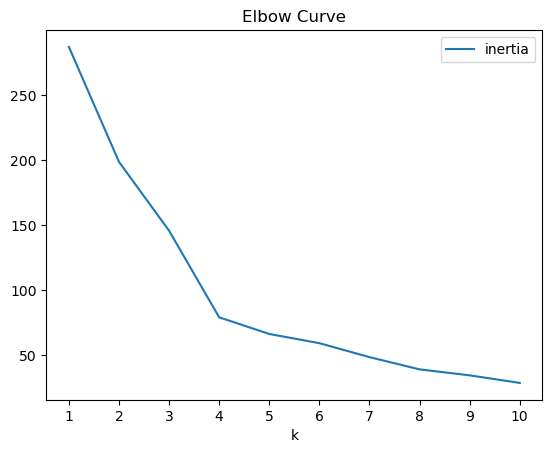

In [15]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Reference: Mod.11 Day 2 Activity 7
# Plot the Elbow curve

df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for `k` would be 4, the curve begins to flatten there.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [16]:
# Initialize the K-Means model using the best value for k
# Using my above answer for the number of clusters
# Still referencing the Mod.11 Day 2 Activity 7
# The number of clusters to choose was also highly influenced by the outline of this project's...
# ..."Cluster Cryptocurrencies with K-Means Using the Original Scaled Data" section of the requirements:
    # "Initialize the K-means model with four clusters by using the best value for k"
    
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=3)

In [17]:
# Fit the K-Means model using the scaled data
# Fit the model
model.fit(market_scaled_df)

C:\Users\tpete\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=3)

In [18]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_cluster = model.predict(market_scaled_df)
# Referencing Mod.11 Day 2 Activity 7
# View the resulting array of cluster values.
print(crypto_cluster)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


In [19]:
# Create a copy of the DataFrame
# Referencing Mod.11 Day 2 Activity 5 (here and below)
predictions_market_scaled_df = market_scaled_df.copy()

In [20]:
# Add a new column to the DataFrame with the predicted clusters
predictions_market_scaled_df["crypto_cluster"] = crypto_cluster

# Display sample data
predictions_market_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

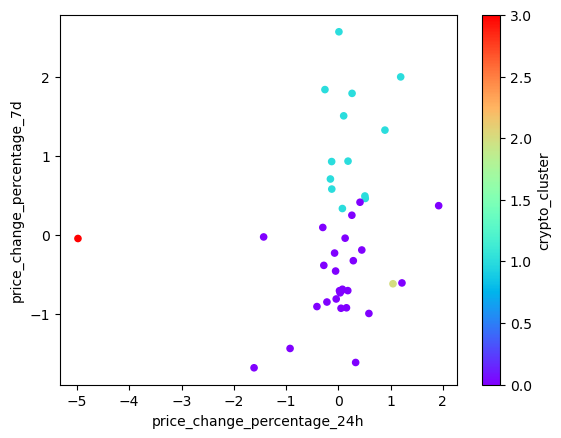

In [21]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
# Referencing Mod.11 Day 3 Activity 1

predictions_market_scaled_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    colormap='rainbow')

### Optimize Clusters with Principal Component Analysis.

In [22]:
# Create a PCA model instance and set `n_components=3`.
# Referencing Mod.11 Day 3 Activity 4 for the following cells
pca = PCA(n_components=3)

In [23]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_pca_data = pca.fit_transform(market_scaled_df)

# View the first five rows of the DataFrame. 
market_pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [24]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
#### Principal Component 1 (PCA1): 0.3719856
#### Principal Component 2 (PCA2): 0.34700813
#### Principal Component 3 (PCA3): 0.17603793

In [25]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Off of the above note - I assume this is meant as a reference to Mod.11 Day 3 Activity 4, which I will be referencing here and below

# Creating a DataFrame with the PCA data
df_market_pca = pd.DataFrame(market_pca_data, columns=["PCA1", "PCA2", "PCA3"])

In [26]:
# Copy the crypto names from the original data
df_market_pca["coin_id"] = market_data_df.index

In [27]:
# Set the coinid column as index
df_market_pca = df_market_pca.set_index("coin_id")

In [28]:
# Display sample data
df_market_pca.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [29]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# Create an empty list to store the inertia values
inertia = []
k = list(range(1, 11))

In [ ]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame. (Created above, called df_market_pca)
# 3. Append the model.inertia_ to the inertia list

# Mod.11 Day 3 Activity 2 (here and below)

for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(df_market_pca)
    inertia.append(k_model.inertia_)

In [31]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

In [32]:
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [33]:
# Display the DataFrame
df_elbow.head(10)

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

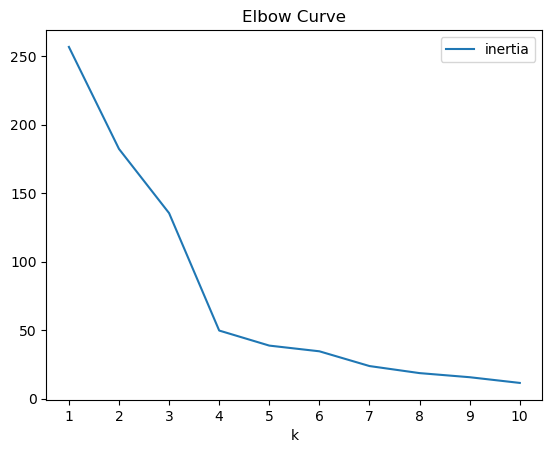

In [34]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** It appears that at k=4, or 4 clusters, the elbow curve starts to straighten. The graph moves rapidly at this point and, visually, it appears to be a the "bend" in the elbow displayed.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** I am not sure if it is supposed to differ, as I had previously determined the same number of clusters. So, it did not change using PCA data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [35]:
# Initialize the K-Means model using the best value for k
# The number of clusters to choose was also highly influenced by the outline of this project's...
# ..."Cluster the Cryptocurrencies with K-Means by Using the PCA Data" section of the requirements:
    # "Initialize the K-means model with four clusters by using the best value for k"

model = KMeans(n_clusters=4, n_init='auto', random_state=0)

In [36]:
# Fit the K-Means model using the PCA data
model.fit(df_market_pca)

C:\Users\tpete\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [37]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_cluster = model.predict(df_market_pca)

# Print the resulting array of cluster values.
print(crypto_cluster)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [38]:
# Create a copy of the DataFrame with the PCA data
# Reference to Mod.11 Day 3 Activity 4

# Creating a DataFrame with the PCA data
df_market_pca_predict = pd.DataFrame(df_market_pca, columns=["PCA1", "PCA2", "PCA3"])

In [39]:
# Add a new column to the DataFrame with the predicted clusters
df_market_pca_predict["crypto_cluster"] = crypto_cluster

In [40]:
# Display sample data
df_market_pca_predict.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

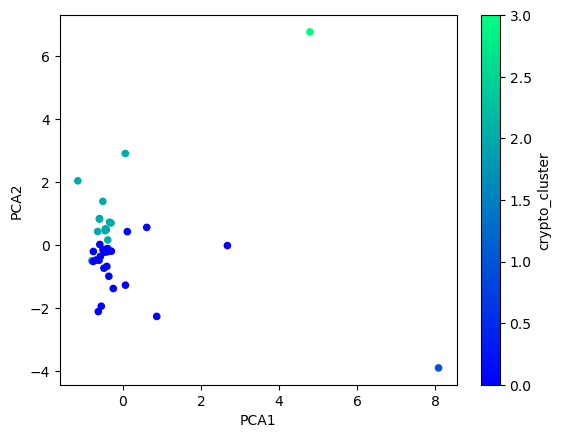

In [41]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# I will use 'winter' for the color, as that palette is used in the example output of the starter code.
df_market_pca_predict.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="crypto_cluster",
    colormap='winter')

* **Question**: What is the impact of using fewer features to cluster the data using K-Means
* **Answer**: By using fewer features to cluster the data using K-means, it can display more defined cluster groups, especially when plotting. By adding more clusters for this model to handle, it reduces variability and can lead to overfitting. By using fewer, but not too few (as the result would show signs of underfitting), I can get a clear view of cluster groups when plotting my data with a scatter plot (using colors as an added reference/disguishment). (Ref: #5)

### Determine the Weights of Each Feature on each Principal Component

In [42]:
# Use the columns from the original scaled DataFrame as the index.
# Referencing Mod 11 Day 3 Activity 4
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2','PCA3'], index=market_scaled_df.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answers:** 

#### Component #1 - `PCA1`: 
* Both the `price_change_percentage_200d` (0.594468) and `price_change_percentage_1y` (0.568379) features had the strongest **positive influence** on this component. The `price_change_percentage_24h` (-0.416728) had the strongest **negative** influence on this component. This tells me that the price change over longer intervals (200 days and 1 year) have stronger positive influence on this component than price changes over smaller (much smaller, 24-hour) intervals of time, that have negative influence. 

####  Component #2 - `PCA2`:
* Both `price_change_percentage_30d` (0.562182), and `price_change_percentage_14d` (0.540415) features had the strongest **positive** influence on this component. `The price_change_percentage_1y` (-0.150789) feature had the strongest **negative** influence on this component, although not by much. This tells me that a "medium" interval of time for price changes would have the strongest positive impact. The two highest intervals of time, `price_change_percentage_200d`(200 days) and `price_change_percentage_1y` (1 year), display scores very close to zero, meaning they have very little influence on this component.

####  Component # 3 - `PCA3`: 
* The `price_change_percentage_7d` (0.787670) feature had the strongest **positive** influence on this component. It scored much higher than any other feature, compared against any of the 3 components. The `price_change_percentage_60d` (-0.361377) had the **strongest** negative influence on the component. The influence of the features on this component decreases in similar intervals from the price change percentage 14-day feature, to the 60-day feature. It then starts to steadily increase at the 200 day mark, which makes me wonder what it would look like if I had more data and columns that contained features that extended years into the future.    